In [1]:
import tensorflow as tf
from tensorflow import keras

# print("Succesfully imported!")

2025-02-07 14:43:49.269868: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-07 14:43:49.383381: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-07 14:43:49.465389: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738919629.557534 1307468 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738919629.579700 1307468 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-07 14:43:49.745488: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load dataset
fashion_mnist = keras.datasets.fashion_mnist       # load dataset


(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# process data
train_images = train_images/ 255.0
test_images = test_images / 255.0


In [8]:
# print(train_images[1][0])

In [5]:
# make the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(784, activation='relu'),
    # keras.layers.Dense(20, activation='relu'),
    # keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/home/jehoniah/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-02-07 14:44:12.196654: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
model.fit(train_images, train_labels, epochs=7)

Epoch 1/7


2025-02-07 14:44:27.228791: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.7959 - loss: 0.5778
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8683 - loss: 0.3597
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8819 - loss: 0.3206
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8904 - loss: 0.2973
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8973 - loss: 0.2758
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9019 - loss: 0.2632
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9066 - loss: 0.2500


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy:', test_acc)

2025-02-07 14:49:56.851324: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8799 - loss: 0.3614
Test accuracy: 0.8787000179290771


In [8]:
predictions = model.predict(test_images)   # always put it in an array
print(predictions)

 32/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

2025-02-07 14:50:05.135979: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[4.6261033e-07 5.9239474e-10 1.7649987e-09 ... 6.9462308e-03
  3.6311268e-10 9.9248028e-01]
 [3.9229821e-05 9.2231257e-13 9.9799258e-01 ... 2.7871206e-17
  6.8819679e-11 4.3885873e-10]
 [7.9190232e-10 9.9999994e-01 3.1278996e-15 ... 1.7436565e-30
  5.7832959e-16 2.2189930e-24]
 ...
 [8.2636929e-05 1.1566181e-08 9.3248918e-06 ... 1.0588587e-09
  9.9945319e-01 3.2376624e-10]
 [8.3332737e-11 9.9999982e-01 3.1960011e-13 ... 1.7109837e-20
  2.3651675e-12 4.7217725e-16]
 [1.3562641e-04 2.3486662e-07 1.5730546e-05 ... 1.9253591e-03
  1.3313736e-05 4.8279140e-05]]


Trouser


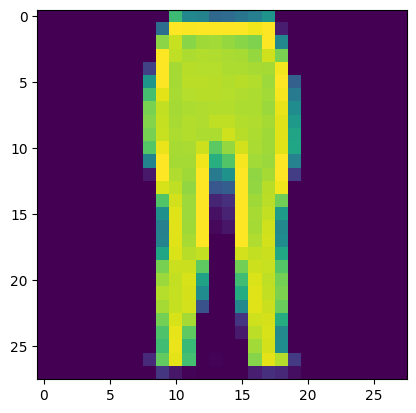

In [17]:
# print(test_images[0].shape)
# print(predictions.shape)
pos = 80
print(class_names[np.argmax(predictions[pos])])

plt.figure()
plt.imshow(train_images[pos])
# plt.colorbar()
plt.grid(False)
plt.show()